In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./data/aqiFix.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   City     518 non-null    object 
 1   Date     518 non-null    object 
 2   PM2_5    518 non-null    float64
 3   PM10     518 non-null    float64
 4   NO       518 non-null    float64
 5   NO2      518 non-null    float64
 6   NOx      518 non-null    float64
 7   NH3      518 non-null    float64
 8   CO       518 non-null    float64
 9   SO2      518 non-null    float64
 10  O3       518 non-null    float64
 11  Benzene  518 non-null    float64
 12  Toluene  19 non-null     float64
 13  Xylene   19 non-null     float64
 14  AQI      518 non-null    float64
dtypes: float64(13), object(2)
memory usage: 60.8+ KB


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_9452\327658281.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

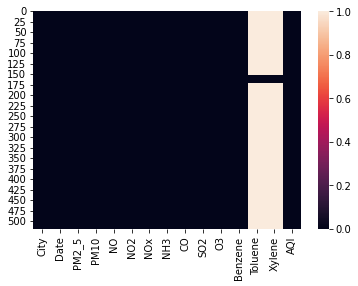

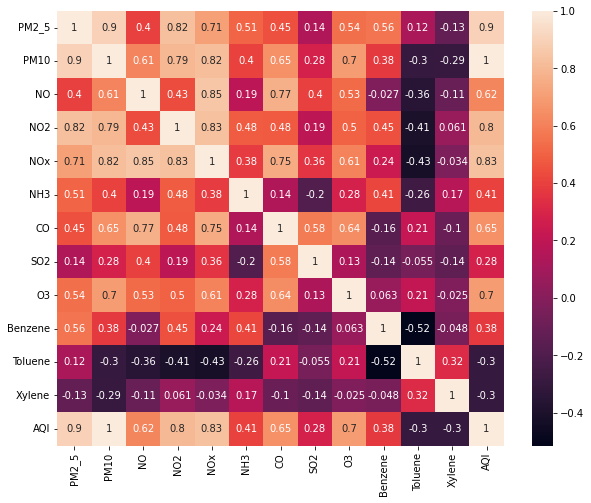

In [4]:
sns.heatmap(df.isnull())
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

# Model regresi linear

In [5]:
features = ['PM2_5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene']
x = df[features]
y = df['AQI']
x.shape, y.shape

((518, 10), (518,))

# Split data training dan testing


In [6]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(130,)

# Model regresi linier

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
x_train = imputer.fit_transform(x_train)
X_test = imputer.transform(X_test)

print(X_test)

lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(X_test)

[[ 15.53  43.76  14.86 ...  14.47  18.53   2.59]
 [ 16.54  76.05  27.84 ...  19.29  16.35   0.17]
 [ 12.73  56.76  20.93 ...   7.44  11.54   1.33]
 ...
 [ 19.26  52.22   9.35 ...   9.31  13.36   5.55]
 [ 33.1  114.51  71.9  ...  25.33  25.95   0.84]
 [ 10.31  34.34  19.59 ...   9.21  19.59   1.46]]


In [55]:
score = lr.score(X_test, y_test)
print("score: ",score)

score:  0.9982387848627284


# INPUTAN

In [8]:
input_d = np.array([[79.78,221.85,62.98,66.11,129.08,1,2.75,21.88,45.29,2.76]])
prediction = lr.predict(input_d)

print('prek', prediction)

prek [221.87405616]


In [9]:
import pickle
filename = './data/aqiOutput.sav'
pickle.dump(lr, open(filename, 'wb'))